In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
dataset = pd.read_csv('student-mat.csv', delimiter=';')

In [7]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
len(dataset.columns)

33

In [15]:
data = dataset[['G1','G2','G3','studytime', 'absences', 'failures']]
data

,G1,G2,G3,studytime,absences,failures
0,5,6,6,2,6,0
1,5,5,6,2,4,0
2,7,8,10,2,10,3
3,15,14,15,3,2,0
4,6,10,10,2,4,0
...,...,...,...,...,...,...
390,9,9,9,2,11,2
391,14,16,16,1,3,0
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [309]:
targetColumn = "G3"
x = data.drop('G3', axis=1)
y = data['G3']

# Split

In [310]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1)#, random_state=10)

# Train (fit)

In [311]:
from sklearn.linear_model import LinearRegression
liner = LinearRegression()
liner.fit(x_train, y_train)

LinearRegression()

# Save model and load

In [312]:
with open('st_modle.pt', "wb") as file:
    pickle.dump(liner, file)

In [313]:
file_ptr = open('st_modle.pt', "rb")
liner = pickle.load(file_ptr)

In [314]:
acc = liner.score(x_test, y_test)

In [315]:
acc

0.6840309101259949

In [316]:
print(f"Coefficient: {liner.coef_}")
print(f"Intercept: {liner.intercept_}")

Coefficient: [ 0.13248569  0.97373497 -0.16214223  0.03105348 -0.39292828]
Intercept: -1.1315075702872708


# Predict

In [317]:
test_result = liner.predict(x_test)

In [318]:
test_result

array([10.77474221,  8.49192217, 11.84851244, 13.33999806,  4.72275373,
       11.66467545,  7.11168667,  8.65388701,  9.9010425 , 13.08721879,
       11.82338469, 14.83182432,  3.78521215,  7.39397326,  9.12439543,
       15.19962485,  9.46845103,  6.08768208,  8.94321444,  6.58238051,
       14.25554642, 10.03742038, 10.71263524,  4.80468796, 10.77474221,
        7.39397326,  7.35106563, 10.38835079, 10.87477747,  6.78086537,
       12.98718353, 14.06095376,  5.24363891,  7.63568689, 14.22588988,
        5.23536715,  9.31178667, 18.09117323, 15.27000357, 10.30613472])

In [319]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test[0], test_result[0]

(array([11, 11,  2,  2,  0], dtype=int64), 10.774742207747076)

In [320]:
for i in range(len(test_result)):
    print(f"{x_test[i]}-\t\t-{y_test[i]}-\t->{test_result[i]}")

[11 11  2  2  0]-		-11-	->10.774742207747076
[8 9 2 4 0]-		-10-	->8.491922165410605
[11 12  1  0  0]-		-10-	->11.848512440280151
[15 14  3  4  2]-		-15-	->13.33999806459211
[8 6 2 2 2]-		-5-	->4.722753729207171
[13 11  3 40  1]-		-11-	->11.664675446271794
[ 9  7  2 18  0]-		-6-	->7.111686674841517
[ 7 10  3  0  1]-		-10-	->8.653887013638515
[11 10  1  0  0]-		-10-	->9.90104249547852
[13 13  1  0  0]-		-12-	->13.08721878876973
[15 12  2  0  1]-		-12-	->11.823384689525772
[11 15  1  2  0]-		-15-	->14.831824324080905
[7 5 3 0 1]-		-0-	->3.785212151634438
[8 8 2 0 0]-		-0-	->7.393973259813174
[11  9  1 19  1]-		-10-	->9.124395429560295
[15 15  2  2  0]-		-16-	->15.199624849527867
[10 10  4  6  0]-		-11-	->9.468451027037359
[7 7 4 4 0]-		-6-	->6.087682079103457
[10  9  2 10  0]-		-10-	->8.943214441294296
[8 7 1 0 0]-		-6-	->6.582380514142927
[14 14  1  2  0]-		-14-	->14.255546415813237
[12 10  2 18  1]-		-10-	->10.03742037997577
[11 11  2  0  0]-		-10-	->10.712635241148767
[ 6  5  1 14  0]-

# Plot Graph

In [321]:
from matplotlib import style

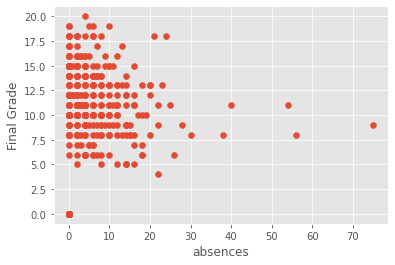

In [332]:
style.use('ggplot')
column_name = 'absences'
plt.scatter(data[column_name], data["G3"])
plt.xlabel(column_name)
plt.ylabel('Final Grade')
plt.show()